In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
import sys
sys.path.insert(0,'/usr/local/lib/python3.9/site-packages')
sys.path

['/usr/local/lib/python3.9/site-packages',
 'c:\\Program Files\\Python312\\python312.zip',
 'c:\\Program Files\\Python312\\DLLs',
 'c:\\Program Files\\Python312\\Lib',
 'c:\\Program Files\\Python312',
 '',
 'C:\\Users\\LENOVO\\AppData\\Roaming\\Python\\Python312\\site-packages',
 'C:\\Users\\LENOVO\\AppData\\Roaming\\Python\\Python312\\site-packages\\win32',
 'C:\\Users\\LENOVO\\AppData\\Roaming\\Python\\Python312\\site-packages\\win32\\lib',
 'C:\\Users\\LENOVO\\AppData\\Roaming\\Python\\Python312\\site-packages\\Pythonwin',
 'c:\\Program Files\\Python312\\Lib\\site-packages']

In [6]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_graphviz
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Visualization helpers
from IPython.display import Image
from six import StringIO
import pydotplus
import graphviz

import warnings
warnings.filterwarnings("ignore")


In [7]:
iris = pd.read_csv("iris.csv")
iris

,sepallength,sepalwidth,petallength,petalwidth,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [8]:
classes = iris['class'].unique().tolist()
classes

['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']

In [9]:
iris.groupby(['class']).mean()

,sepallength,sepalwidth,petallength,petalwidth
class,,,,
Iris-setosa,5.006,3.418,1.464,0.244
Iris-versicolor,5.936,2.770,4.260,1.326
Iris-virginica,6.588,2.974,5.552,2.026


In [10]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   sepallength  150 non-null    float64
 1   sepalwidth   150 non-null    float64
 2   petallength  150 non-null    float64
 3   petalwidth   150 non-null    float64
 4   class        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [11]:
# Putting feature variable to X
X = iris.drop('class',axis=1)

# Putting response variable to y
y = iris['class']

In [12]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.30, 
                                                    random_state = 99)
X_train.head()

,sepallength,sepalwidth,petallength,petalwidth
10,5.4,3.7,1.5,0.2
25,5.0,3.0,1.6,0.2
13,4.3,3.0,1.1,0.1
131,7.9,3.8,6.4,2.0
65,6.7,3.1,4.4,1.4


In [13]:
dt_iris = DecisionTreeClassifier()
dt_iris.fit(X_train, y_train)

DecisionTreeClassifier()

In [14]:
y_pred_train = dt_iris.predict(X_train)

print(classification_report(y_train, y_pred_train))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        38
Iris-versicolor       1.00      1.00      1.00        32
 Iris-virginica       1.00      1.00      1.00        35

       accuracy                           1.00       105
      macro avg       1.00      1.00      1.00       105
   weighted avg       1.00      1.00      1.00       105



In [15]:
print(confusion_matrix(y_train,y_pred_train))
print(accuracy_score(y_train,y_pred_train))

[[38  0  0]
 [ 0 32  0]
 [ 0  0 35]]
1.0


In [16]:
y_pred_default = dt_iris.predict(X_test)

print(classification_report(y_test, y_pred_default))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        12
Iris-versicolor       0.94      0.94      0.94        18
 Iris-virginica       0.93      0.93      0.93        15

       accuracy                           0.96        45
      macro avg       0.96      0.96      0.96        45
   weighted avg       0.96      0.96      0.96        45



In [17]:
print(confusion_matrix(y_test,y_pred_default))
print(accuracy_score(y_test,y_pred_default))

[[12  0  0]
 [ 0 17  1]
 [ 0  1 14]]
0.9555555555555556


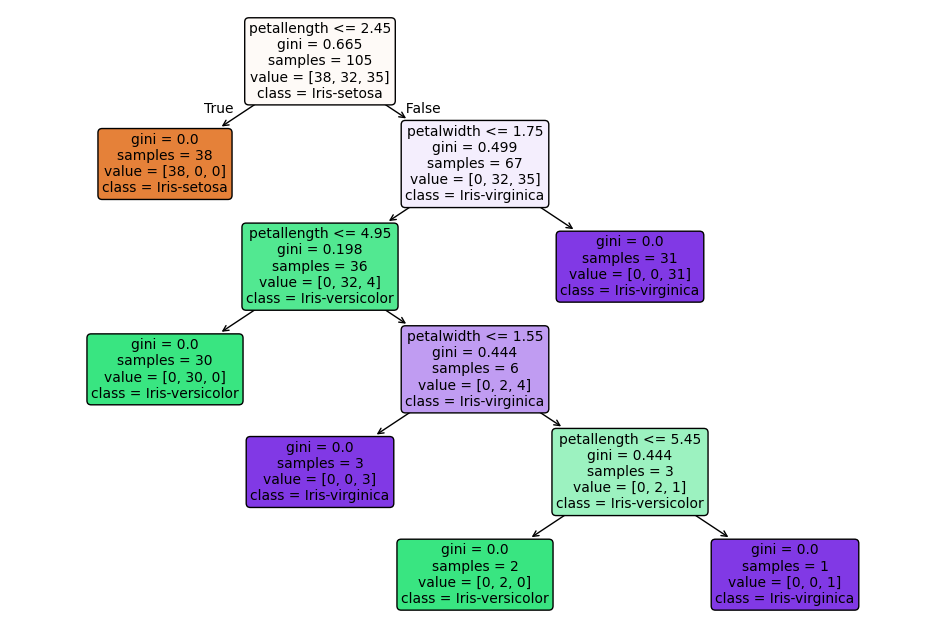

In [20]:

features = list(X_train.columns)

import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(12,8))
plot_tree(dt_iris,
          feature_names=features,
          class_names=dt_iris.classes_,
          filled=True, rounded=True, fontsize=10)
plt.show()


In [21]:
# GridSearchCV to find optimal max_depth
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_depth': range(1, 10)}

# instantiate the model
dtree = DecisionTreeClassifier(criterion = "gini", 
                               random_state = 100)

# fit tree on training data
tree = GridSearchCV(dtree, parameters, 
                    cv=n_folds, 
                   scoring="accuracy", return_train_score=True)
tree.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=100),
             param_grid={'max_depth': range(1, 10)}, return_train_score=True,
             scoring='accuracy')

In [22]:
# scores of GridSearch CV
scores = tree.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.004875,0.004370,0.004252,0.002424,1,{'max_depth': 1},0.714286,0.714286,0.714286,0.666667,...,0.695238,0.023328,9,0.690476,0.690476,0.690476,0.702381,0.702381,0.695238,0.005832
1,0.002347,0.002180,0.000533,0.000667,2,{'max_depth': 2},0.952381,1.000000,0.857143,0.952381,...,0.942857,0.046657,7,0.964286,0.952381,0.988095,0.964286,0.964286,0.966667,0.011664
2,0.001464,0.001387,0.002404,0.003032,3,{'max_depth': 3},0.952381,1.000000,0.809524,0.952381,...,0.942857,0.069985,7,0.964286,0.976190,0.988095,0.988095,0.976190,0.978571,0.008909
3,0.009642,0.004722,0.001427,0.001234,4,{'max_depth': 4},1.000000,1.000000,0.857143,0.952381,...,0.952381,0.052164,6,0.976190,0.988095,1.000000,0.988095,1.000000,0.990476,0.008909
4,0.001978,0.002471,0.004180,0.003313,5,{'max_depth': 5},1.000000,1.000000,0.857143,1.000000,...,0.961905,0.055533,1,0.988095,1.000000,1.000000,1.000000,1.000000,0.997619,0.004762


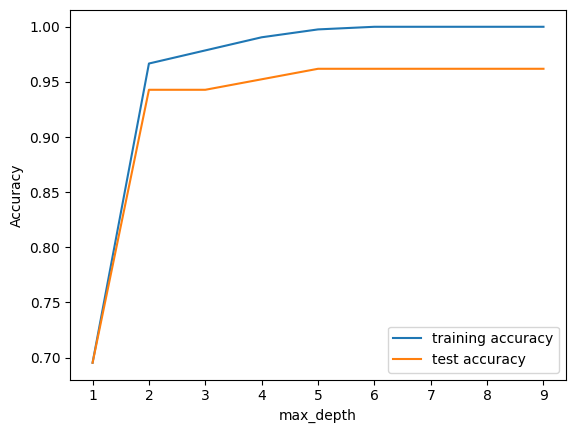

In [23]:
# plotting accuracies with max_depth
plt.figure()
plt.plot(scores["param_max_depth"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_depth"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [24]:
# GridSearchCV to find optimal max_depth
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_leaf': range(1, 40, 3)}

# instantiate the model
dtree = DecisionTreeClassifier(criterion = "gini", 
                               random_state = 100)

# fit tree on training data
tree = GridSearchCV(dtree, parameters, 
                    cv=n_folds, 
                   scoring="accuracy", return_train_score=True)
tree.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=100),
             param_grid={'min_samples_leaf': range(1, 40, 3)},
             return_train_score=True, scoring='accuracy')

In [25]:
# scores of GridSearch CV
scores = tree.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.004274,0.002177,0.006307,0.002988,1,{'min_samples_leaf': 1},1.000000,1.0,0.857143,1.000000,...,0.961905,0.055533,1,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
1,0.001422,0.002845,0.001773,0.002434,4,{'min_samples_leaf': 4},0.952381,1.0,0.857143,1.000000,...,0.961905,0.055533,1,0.964286,0.976190,0.988095,0.976190,0.976190,0.976190,0.007529
2,0.004753,0.005943,0.001651,0.001976,7,{'min_samples_leaf': 7},0.952381,1.0,0.857143,0.952381,...,0.942857,0.046657,3,0.964286,0.964286,0.988095,0.964286,0.964286,0.969048,0.009524
3,0.002530,0.003111,0.003151,0.003988,10,{'min_samples_leaf': 10},0.952381,1.0,0.857143,0.952381,...,0.942857,0.046657,3,0.964286,0.952381,0.988095,0.964286,0.964286,0.966667,0.011664
4,0.004773,0.003182,0.001207,0.001167,13,{'min_samples_leaf': 13},0.952381,1.0,0.857143,0.952381,...,0.942857,0.046657,3,0.964286,0.952381,0.988095,0.964286,0.964286,0.966667,0.011664


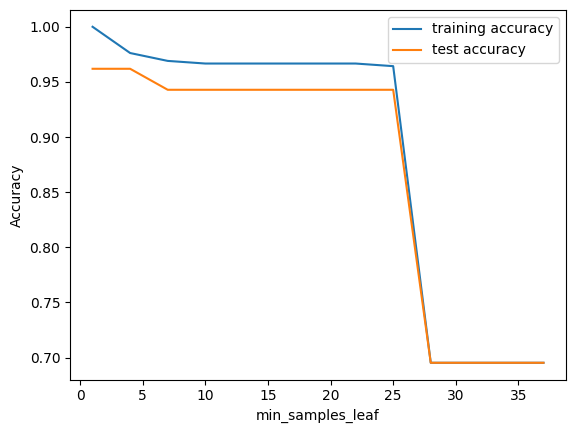

In [26]:
# plotting accuracies with min_samples_leaf
plt.figure()
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_leaf")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [29]:
# GridSearchCV to find optimal min_samples_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_split': range(3, 40, 3)}

# instantiate the model
dtree = DecisionTreeClassifier(criterion = "gini", 
                               random_state = 100)

# fit tree on training data
tree = GridSearchCV(dtree, parameters, 
                    cv=n_folds, 
                   scoring="accuracy", return_train_score=True)
tree.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=100),
             param_grid={'min_samples_split': range(3, 40, 3)},
             return_train_score=True, scoring='accuracy')

In [28]:
# Print the results of GridSearch CV
scores = tree.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.005259,0.004773,0.003853,0.003253,3,{'min_samples_split': 3},1.000000,1.0,0.809524,1.000000,...,0.952381,0.073771,1,1.000000,1.000000,0.988095,1.000000,1.00000,0.997619,0.004762
1,0.003271,0.005026,0.000000,0.000000,6,{'min_samples_split': 6},1.000000,1.0,0.809524,0.952381,...,0.952381,0.073771,1,0.976190,0.988095,0.988095,0.988095,0.97619,0.983333,0.005832
2,0.000800,0.001601,0.003101,0.003284,9,{'min_samples_split': 9},0.952381,1.0,0.809524,0.952381,...,0.942857,0.069985,3,0.964286,0.976190,0.988095,0.988095,0.97619,0.978571,0.008909
3,0.002035,0.001993,0.001202,0.002405,12,{'min_samples_split': 12},0.952381,1.0,0.809524,0.952381,...,0.942857,0.069985,3,0.964286,0.976190,0.988095,0.988095,0.97619,0.978571,0.008909
4,0.003617,0.006047,0.000726,0.001050,15,{'min_samples_split': 15},0.952381,1.0,0.809524,0.952381,...,0.942857,0.069985,3,0.964286,0.976190,0.988095,0.988095,0.97619,0.978571,0.008909


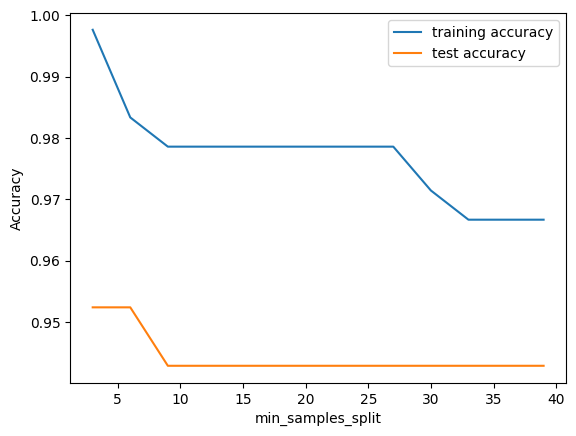

In [30]:
# plotting accuracies with min_samples_leaf
plt.figure()
plt.plot(scores["param_min_samples_split"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_split"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_split")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [31]:
# Create the parameter grid 
param_grid = {
    'max_depth': range(1, 10, 1),
    'min_samples_leaf': range(1, 40, 2),
    'min_samples_split': range(2, 30, 2),
    'criterion': ["entropy", "gini"]
}

n_folds = 5

# Instantiate the grid search model
iristree = DecisionTreeClassifier()
grid_search = GridSearchCV(estimator = iristree, param_grid = param_grid, 
                          cv = n_folds, verbose = 1)

# Fit the grid search to the data
grid_search.fit(X_train,y_train)


Fitting 5 folds for each of 5040 candidates, totalling 25200 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': range(1, 10),
                         'min_samples_leaf': range(1, 40, 2),
                         'min_samples_split': range(2, 30, 2)},
             verbose=1)

In [32]:
# cv results
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.004540,0.002786,0.001527,0.001556,entropy,1,1,2,"{'criterion': 'entropy', 'max_depth': 1, 'min_...",0.714286,0.714286,0.714286,0.666667,0.666667,0.695238,0.023328,3137
1,0.003527,0.002837,0.001152,0.001871,entropy,1,1,4,"{'criterion': 'entropy', 'max_depth': 1, 'min_...",0.714286,0.714286,0.714286,0.666667,0.666667,0.695238,0.023328,3137
2,0.001669,0.003339,0.000000,0.000000,entropy,1,1,6,"{'criterion': 'entropy', 'max_depth': 1, 'min_...",0.714286,0.714286,0.714286,0.666667,0.666667,0.695238,0.023328,3137
3,0.000000,0.000000,0.003207,0.006415,entropy,1,1,8,"{'criterion': 'entropy', 'max_depth': 1, 'min_...",0.714286,0.714286,0.714286,0.666667,0.666667,0.695238,0.023328,3137
4,0.003217,0.006434,0.000000,0.000000,entropy,1,1,10,"{'criterion': 'entropy', 'max_depth': 1, 'min_...",0.714286,0.714286,0.714286,0.666667,0.666667,0.695238,0.023328,3137
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5035,0.001358,0.001678,0.003362,0.002706,gini,9,39,20,"{'criterion': 'gini', 'max_depth': 9, 'min_sam...",0.714286,0.714286,0.714286,0.666667,0.666667,0.695238,0.023328,3137
5036,0.003929,0.001188,0.002061,0.001949,gini,9,39,22,"{'criterion': 'gini', 'max_depth': 9, 'min_sam...",0.714286,0.714286,0.714286,0.666667,0.666667,0.695238,0.023328,3137
5037,0.003551,0.002024,0.001974,0.002463,gini,9,39,24,"{'criterion': 'gini', 'max_depth': 9, 'min_sam...",0.714286,0.714286,0.714286,0.666667,0.666667,0.695238,0.023328,3137
5038,0.002317,0.002053,0.003083,0.001814,gini,9,39,26,"{'criterion': 'gini', 'max_depth': 9, 'min_sam...",0.714286,0.714286,0.714286,0.666667,0.666667,0.695238,0.023328,3137


In [33]:
# printing the optimal accuracy score and hyperparameters
print("best accuracy", grid_search.best_score_)
print(grid_search.best_estimator_)

best accuracy 0.9714285714285715
DecisionTreeClassifier(criterion='entropy', max_depth=4, min_samples_leaf=3)


In [34]:
# model with optimal hyperparameters
iristree1 = DecisionTreeClassifier(criterion = "entropy", 
                                  random_state = 100,
                                  max_depth=4, 
                                  min_samples_leaf=3,
                                  min_samples_split=2)
iristree1.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4, min_samples_leaf=3,
                       random_state=100)

In [35]:
# accuracy score
iristree1.score(X_test,y_test)

0.9555555555555556

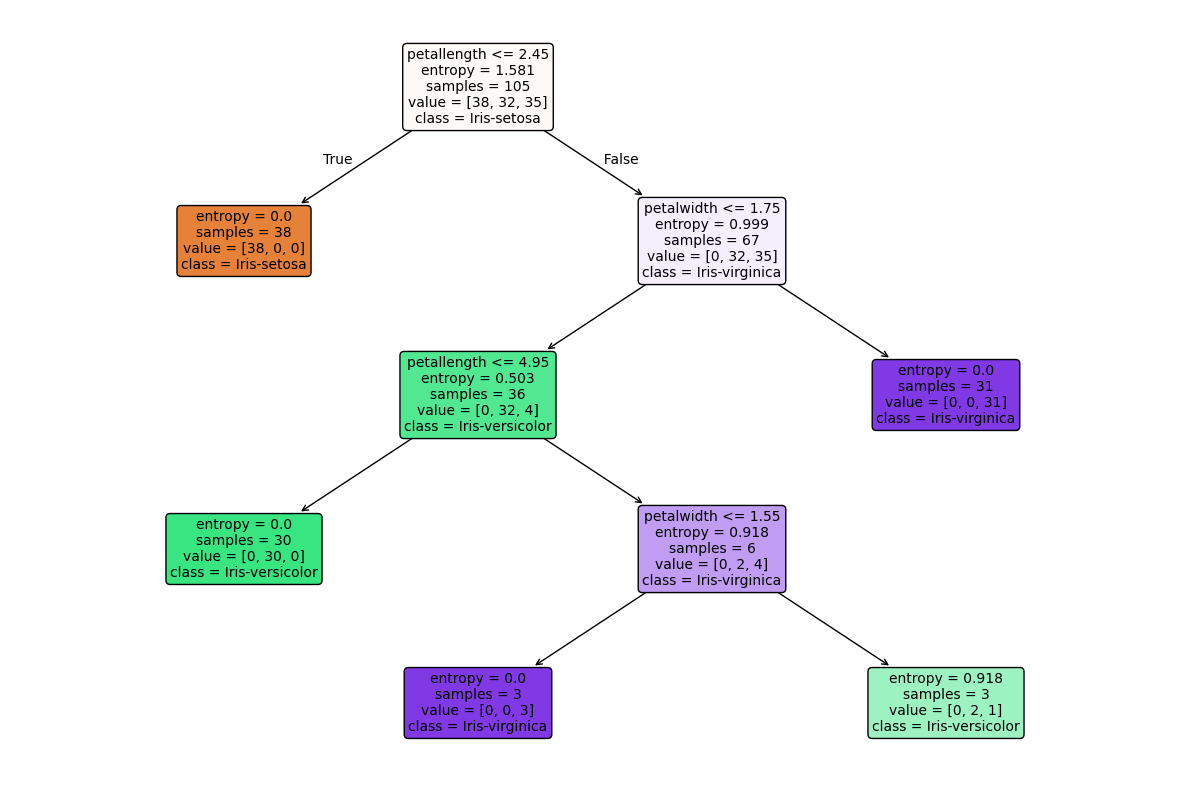

In [36]:
features = list(X_train.columns)

import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# inline display
plt.figure(figsize=(12,8))
plot_tree(iristree1,
          feature_names=features,
          class_names=iristree1.classes_,
          filled=True, rounded=True, fontsize=10)
plt.tight_layout()
plt.show()

# optional: save to PNG file
plt.figure(figsize=(12,8))
plot_tree(iristree1,
          feature_names=features,
          class_names=iristree1.classes_,
          filled=True, rounded=True, fontsize=10)
plt.tight_layout()
plt.savefig('iristree1.png', dpi=300)
plt.close()


In [37]:
# tree with max_depth = 3
iristree2 = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 100,
                                  max_depth=3, 
                                  min_samples_leaf=4,
                                  min_samples_split=4)
iristree2.fit(X_train, y_train)

# score
print(iristree2.score(X_test,y_test))

0.9555555555555556


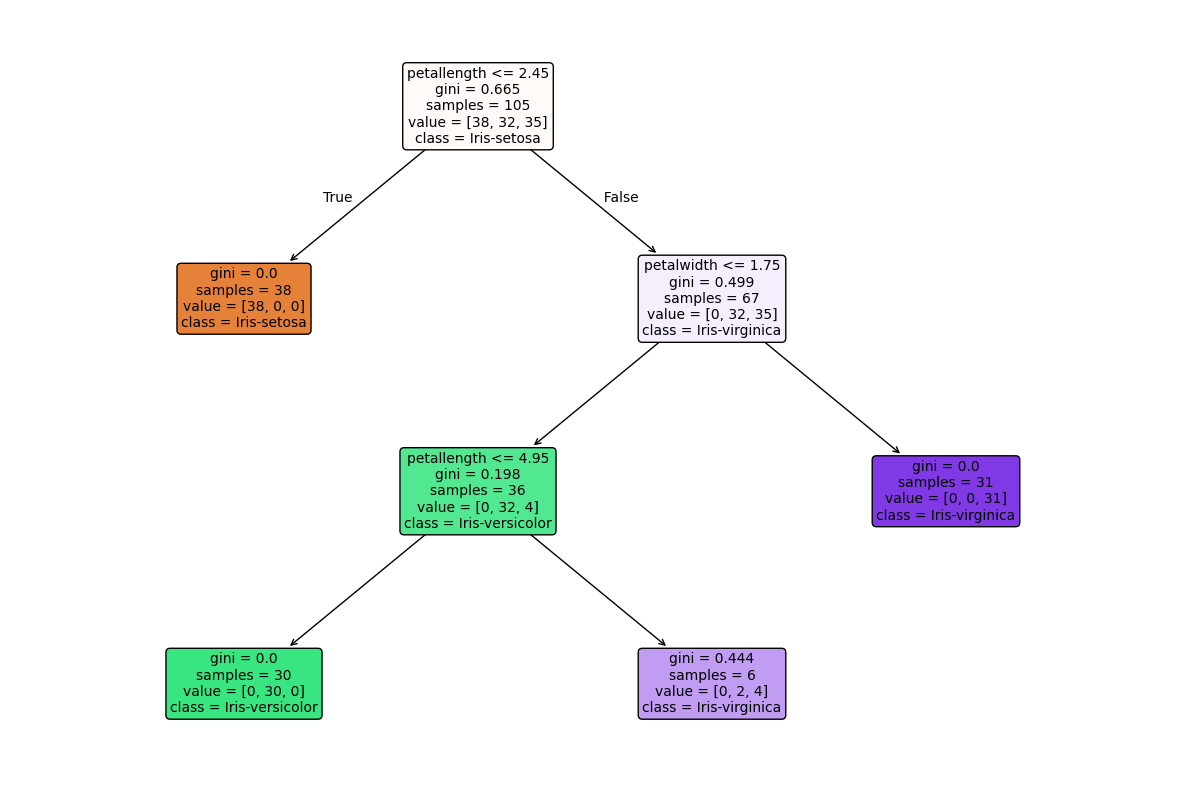

In [38]:

# plotting tree with max_depth=3 (no Graphviz / pydotplus required)
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

features = list(X_train.columns)

plt.figure(figsize=(12,8))
plot_tree(iristree2,
          feature_names=features,
          class_names=iristree2.classes_,
          filled=True, rounded=True, fontsize=10)
plt.tight_layout()
plt.show()

# optional: save to PNG
plt.figure(figsize=(12,8))
plot_tree(iristree2,
          feature_names=features,
          class_names=iristree2.classes_,
          filled=True, rounded=True, fontsize=10)
plt.tight_layout()
plt.savefig('iristree2.png', dpi=300)
plt.close()


In [39]:
# Classification Metrix
from sklearn.metrics import classification_report,confusion_matrix
y_pred = iristree1.predict(X_test)
print(classification_report(y_test, y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        12
Iris-versicolor       0.94      0.94      0.94        18
 Iris-virginica       0.93      0.93      0.93        15

       accuracy                           0.96        45
      macro avg       0.96      0.96      0.96        45
   weighted avg       0.96      0.96      0.96        45



In [40]:
# Print the Confusion Matrix
print(confusion_matrix(y_test,y_pred))

[[12  0  0]
 [ 0 17  1]
 [ 0  1 14]]
